# NLP Assignment 1 (40% of grade): Sentiment Analysis from Tweets

This coursework will involve you implementing functions for a text classifier, which you will train to identify the **sentiment expressed in a text** in a dataset of approx. 27,000 entries, which will be split into a 80%/20% training/test split. 

In this template you are given the basis for that implementation, though some of the functions are missing, which you have to fill in.

Follow the instructions file **NLP_Assignment_1_Instructions.pdf** for details of each question - the outline of what needs to be achieved for each question is as below.

You must submit all **ipython notebooks and extra resources you need to run the code if you've added them** in the code submission, and a **2 page report (pdf)** in the report submission on QMPlus where you report your methods and findings according to the instructions file for each question.

In [12]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support, accuracy_score # to report on precision and recall
import numpy as np

In [13]:
def load_data(path):
    """Load data from a tab-separated file and append it to raw_data."""
    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))

def split_and_preprocess_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)),label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))

# Question 1: Input and Basic preprocessing (10 marks)

In [14]:
def parse_data_line(data_line):
    # Should return a tuple of the label as just positive or negative and the statement
    # e.g. (label, statement)
    label = data_line[1] # sentiment label in the second column
    statement = data_line[2] # Tweet in the third column
    return (label, statement)

In [15]:
# Input: a string of one statement
def pre_process(text):
    # Should return a list of tokens
    tokens = text.split() # Splits text by white space to get list of words
    return tokens

# Question 2: Basic Feature Extraction (20 marks)

In [16]:
global_feature_dict = {} # A global dictionary of features

def to_feature_vector(tokens):
    # Should return a dictionary containing features as keys, and weights as values
    feature_vector = {} # Initialize an empty dictionary for the feature vector
    
    # Iterating through each token in the preprocessed text
    for token in tokens:
        # In a binary BoW representation, setting the value to 1 for each token
        feature_vector[token] = 1
        
        # Updating the global_feature_dict
        if token not in global_feature_dict:
            global_feature_dict[token] = 1  # Setting to 1 if this is the first occurrence of the token
        else:
            global_feature_dict[token] += 1  # Incrementing the count if the token has occurred before
    
    return feature_vector

In [17]:
# TRAINING AND VALIDATING OUR CLASSIFIER

def train_classifier(data):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

# Question 3: Cross-validation (20 marks)

In [18]:
#solution
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


def cross_validate(dataset, folds):
    # Initialising variables to store the sum of metrics across all folds
    total_precision = 0
    total_recall = 0
    total_f1_score = 0
    total_accuracy = 0

    fold_size = int(len(dataset)/folds) + 1
    
    for i in range(0,len(dataset),int(fold_size)):
        # inserting code here that trains and tests on the 10 folds of data in the dataset
        print("Fold start on items %d - %d" % (i, i+fold_size))
        # FILL IN THE METHOD HERE
        
        # Splitting the dataset into training and testing sets for this fold
        train_data = dataset[:i] + dataset[i + fold_size:]
        test_data = dataset[i:i + fold_size]
        
        # Splitting the data and labels for training and testing sets
        train_data, train_labels = zip(*train_data)
        test_data, test_labels = zip(*test_data)
        
        # Training the classifier
        classifier = train_classifier(list(zip(train_data, train_labels)))
        
        # Predicting labels on the test set
        predicted_labels = predict_labels(test_data, classifier)
        
        # Computing precision, recall, f1_score, and accuracy for this fold
        precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='weighted')
        accuracy = accuracy_score(test_labels, predicted_labels)
        
        # Summing the metrics for averaging later
        total_precision += precision
        total_recall += recall
        total_f1_score += f1
        total_accuracy += accuracy
        
    # Averaging the metrics over all folds
    avg_precision = total_precision / folds
    avg_recall = total_recall / folds
    avg_f1_score = total_f1_score / folds
    avg_accuracy = total_accuracy / folds
        
    # Creating a dictionary to hold the average metrics
    cv_results = {
        'precision': avg_precision,
        'recall': avg_recall,
        'f1_score': avg_f1_score,
        'accuracy': avg_accuracy
    }
    
    return cv_results

In [19]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(preProcess(reviewSample)))

In [20]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'sentiment-dataset.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_data(data_file_path) 

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 33540 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 33540 rawData, 26832 trainData, 6708 testData
Training Samples: 
26832
Features: 
104038


In [21]:
cross_validate(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented

Fold start on items 0 - 2684
Training Classifier...
Fold start on items 2684 - 5368
Training Classifier...
Fold start on items 5368 - 8052
Training Classifier...
Fold start on items 8052 - 10736
Training Classifier...
Fold start on items 10736 - 13420
Training Classifier...
Fold start on items 13420 - 16104
Training Classifier...
Fold start on items 16104 - 18788
Training Classifier...
Fold start on items 18788 - 21472
Training Classifier...
Fold start on items 21472 - 24156
Training Classifier...
Fold start on items 24156 - 26840
Training Classifier...


{'precision': 0.8286815927108231,
 'recall': 0.8304664857796519,
 'f1_score': 0.8288550081319425,
 'accuracy': 0.8304664857796519}

# Question 4: Error Analysis (20 marks)

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    # cm = metrics.confusion_matrix(y_test, preds, labels)
    cm = metrics.confusion_matrix(y_test, preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

Training Classifier...


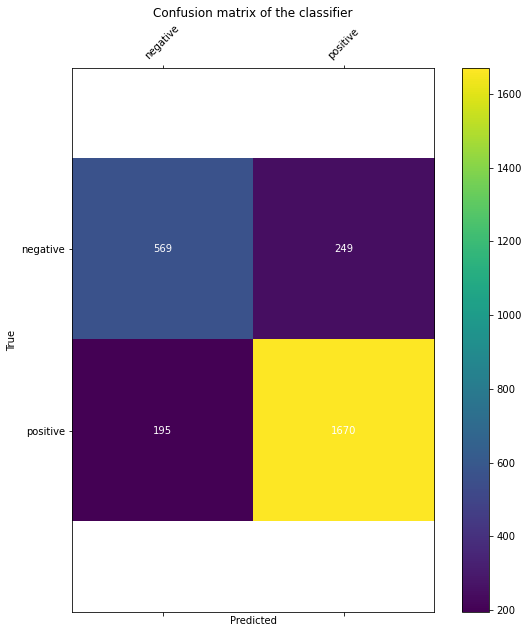

In [29]:
# creating a split similar to the first fold of my cross-validation process
fold_size = len(train_data) // 10

# Defining the first fold the test set
test_data_fold = train_data[:fold_size]
train_data_fold = train_data[fold_size:]

# Splitting the data and labels for training and testing sets
train_samples_fold, train_labels_fold = zip(*train_data_fold)
test_samples_fold, test_labels_fold = zip(*test_data_fold)

# Training the classifier
classifier_fold = train_classifier(list(zip(train_samples_fold, train_labels_fold)))

# Predicting labels on the test set
predicted_labels_fold = predict_labels(test_samples_fold, classifier_fold)

# Generating and plotting the confusion matrix with dynamic labels
unique_labels = list(set(test_labels_fold))  # Extract unique labels from the test data
confusion_matrix_heatmap(test_labels_fold, predicted_labels_fold, labels=unique_labels)